In [1]:
mass = 3 #kg
gravity = 10 #m/s^2
magnet_force = 1000 #N
percent_weight_on_wheels = 0.8

normal_on_wheel = (mass * gravity + magnet_force) * percent_weight_on_wheels / 2

friction_coef_wheel = 1.0
max_force_on_wheel = normal_on_wheel * friction_coef_wheel
print(f'Maximum force wheel can excert before sliping is {max_force_on_wheel} N')


Maximum force wheel can excert before sliping is 412.0 N


In [2]:
wheel_radius = 0.02 #40mm diameter
max_torque_on_wheel = max_force_on_wheel * wheel_radius
print(f'Maximum torque wheel can excert before sliping is {max_torque_on_wheel} N.m')

Maximum torque wheel can excert before sliping is 8.24 N.m


In [3]:
gear_ratio = 50/13
max_torque_on_motor = max_torque_on_wheel / gear_ratio
print(f'Maximum torque on motor is {max_torque_on_motor} N.m')

Maximum torque on motor is 2.1424 N.m


From Maxon DCX35L  18V Datasheet
Stall Current = 84.8 A
Torque Constant = 23.4 mNm/A
Speed Constant = 408 RPM/V
Speed/torque gradient =  3.7 RPM/mNm
Rotor inertia = 102 gcm^2
Terminal resistance = 0.212 Ohn

In [4]:
from matplotlib import pyplot as plt

Stable at 0.0049 seconds, with 49 steps


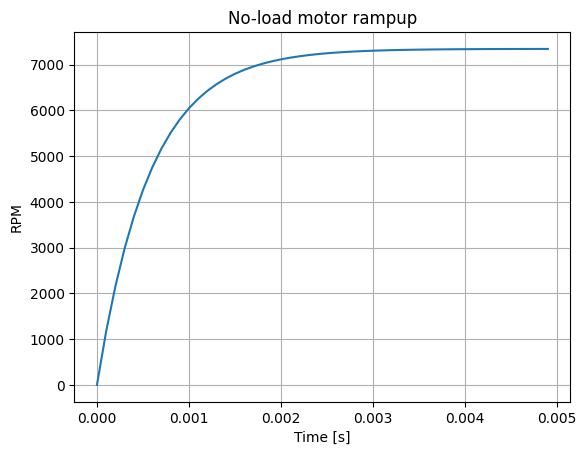

In [8]:
# Motor no-load simulation
timestep = 0.0001 #s
motor_a = [0]
motor_rotation = [0]
motor_torque = [0]
voltage = 18
motor_resistance = 0.212
kv = 408/60
kt = 23.4 / 1000
r_inertia = 102 /1000 /100/100
vt_grad = 3.7 / 60
motor_rpm = [0]
t = [0]
unstable = 2
i = 0
while unstable:
    motor_rotation.append(motor_rotation[-1]+motor_a[-1]*timestep)
    current = (voltage-motor_rotation[-1]/kv) /motor_resistance
    step_torque = current * kt
    motor_torque.append(step_torque)
    motor_a.append(step_torque/r_inertia)
    motor_rpm.append(motor_rotation[-1]*60)
    t.append(i*timestep)
    if len(t)>10 and (max(motor_rotation[-10:]) - min(motor_rotation[-10:])) < 0.1:
        unstable = 0
        print(f"Stable at {t[-1]} seconds, with {i} steps")
    i+=1
plt.plot(t, motor_rpm)
plt.title("No-load motor rampup")
plt.ylabel("RPM")
plt.xlabel("Time [s]")
plt.grid()



